In [134]:
import deepdish as dd
import os
import numpy as np
import pylab as plt

In [161]:
python = '/Users/gravity/opt/anaconda3/envs/gwforge_18Oct24/bin/python'

In [178]:
test_data_local = dd.io.load('../output_data/1_day_prec_z_10_local_SNR_data.h5')['Optimal_SNR']
test_data_parallel = dd.io.load('../output_data/1_day_prec_z_10_parallel_SNR_data.h5')['Optimal_SNR']
test_data_serial = dd.io.load('../output_data/1_day_prec_z_10_serial_SNR_data.h5')['Optimal_SNR']
data_7_days = dd.io.load('../output_data/7_days_prec_z_10_parallel_SNR_data.h5')['Optimal_SNR']

In [175]:
test_data_local.keys()

Index(['inclination', 'distance', 'mass1', 'mass2', 'coa_phase', 'f_ref',
       'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z',
       'approximant', 'f_lower', 'delta_f', 'f_final', 'dec', 'trigger_time',
       'polarization', 'ra', 'SNR_L1', 'SNR_H1', 'SNR_V1', 'SNR_network_sq',
       'SNR_network'],
      dtype='object')

In [179]:
def get_detected_SNRs(data_dict, ifo_threshold=8, network_threshold=10):
    detected = {}
    SNR_keys = [key for key in data_dict.keys() if 'SNR' in key]
    for key in SNR_keys:
        if "network_sq" in key:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > network_threshold**2]
        elif "network" in key:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > network_threshold]
        else:
            detected[key.split('SNR_')[-1]] = data_dict[data_dict[key] > ifo_threshold]
    return(detected)

In [181]:
detected_7_days_netw = get_detected_SNRs(data_7_days)['network']

In [182]:
detected_7_days_netw.keys()

Index(['inclination', 'distance', 'mass1', 'mass2', 'coa_phase', 'f_ref',
       'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z',
       'approximant', 'f_lower', 'delta_f', 'f_final', 'dec', 'trigger_time',
       'polarization', 'ra', 'SNR_L1', 'SNR_H1', 'SNR_V1', 'SNR_network_sq',
       'SNR_network'],
      dtype='object')

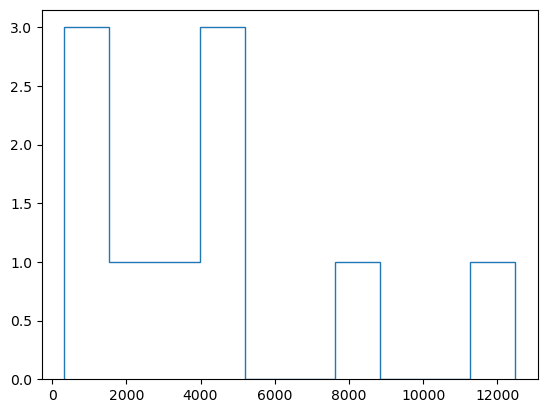

In [186]:
plt.hist(detected_7_days_netw['distance'], histtype=u'step');

In [170]:
get_detected_SNRs(test_data_local)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network_sq,SNR_network
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1567,-0.698742,1.893034e+09,0.619728,5.490057,6.509596,6.353447,8.570054,156.186957,12.497478
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,1567,-0.664756,1.893088e+09,0.007347,3.332223,3.096475,5.307420,10.937706,157.390280,12.545528


In [171]:
get_detected_SNRs(test_data_serial)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network_sq,SNR_network
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1567,-0.698742,1.893034e+09,0.619728,5.490057,6.509596,6.353447,8.570055,156.186961,12.497478
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,1567,-0.664756,1.893088e+09,0.007347,3.332223,3.096476,5.307420,10.937706,157.390286,12.545529


In [172]:
get_detected_SNRs(test_data_parallel)['network']

,inclination,distance,mass1,mass2,coa_phase,f_ref,spin1x,spin1y,spin1z,spin2x,...,f_final,dec,trigger_time,polarization,ra,SNR_L1,SNR_H1,SNR_V1,SNR_network_sq,SNR_network
34,0.532770,2810.675418,47.076243,29.655835,5.629477,5.0,0.274178,0.838540,-0.230261,-0.238946,...,1567,-0.698742,1.893034e+09,0.619728,5.490057,6.509596,6.353447,8.570055,156.186961,12.497478
235,1.447689,1803.846948,59.656395,53.806263,1.258496,5.0,-0.024972,0.020333,0.086569,0.293121,...,1567,-0.664756,1.893088e+09,0.007347,3.332223,3.096476,5.307420,10.937706,157.390286,12.545529


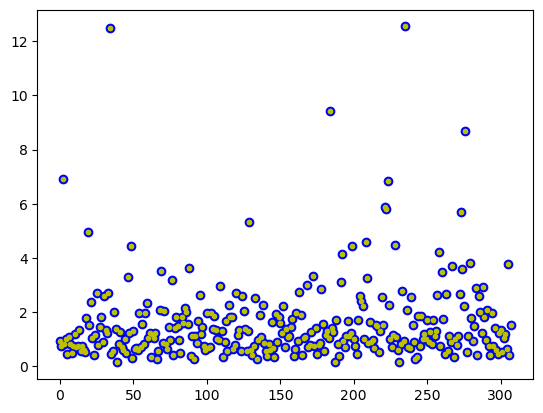

In [173]:
plt.plot(test_data_serial['SNR_network'], 'bo')
plt.plot(test_data_parallel['SNR_network'], 'g.')
plt.plot(test_data_local['SNR_network'], 'y.')